In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## Gather

In [6]:
# Source 1 - Twitter archive data

# Convert Twitter archive data to a DataFrame
df_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

In [3]:
# Source 2 - Image prediction data
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Save predictions result file locally to a DataFrame    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
              file.write(response.content)

# Convert image predictions file to a DataFrame
df_prediction = pd.read_csv('data/image-predictions.tsv', sep='\t')

In [7]:
# Source 3 - Twitter API

# Tweepy setup
consumer_key = #####
consumer_secret = #####
access_token = #####
access_secret = #####
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

SyntaxError: invalid syntax (<ipython-input-7-56a2db1079ce>, line 4)

In [7]:
# Download data per tweet id 
missing_data = []
#debug = [892420643555336193, 892420643555336193, 948761950363664385]
with open('tweet_json.txt', 'a', encoding='utf-8') as file:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            missing_data.append(tweet_id)
            continue

Rate limit reached. Sleeping for: 451
Rate limit reached. Sleeping for: 356


In [8]:
df_tweetdata = pd.DataFrame()

with open('tweet_json.txt', "r") as file:
    for entry in file:
        try:
            data = json.loads(entry)           
            df_tweetdata = \
            df_tweetdata.append(pd.DataFrame({'tweet_id': data['id'], 
                                              'retweet_count': data['retweet_count'],
                                              'favorite_count': data['favorite_count']},
                                             index=[0]), ignore_index=True)
        except:
            print("Error with entry {}".format(data['id']))
            continue

## Assess

#### Twitter Archive DataFrame

In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- The *timestamp* and *retweeted_status_timestamp* columns are not a datatime type
- The *expanded_urls* column is missing data
- `df_archive` includes retweets and replies

In [10]:
pd.set_option('display.max_colwidth', -1)  
df_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

- Newline characters in the text column
- Columns names doggo, floofer, pupper, puppo are considered ["DoggoLingo"](https://www.npr.org/sections/alltechconsidered/2017/04/23/524514526/dogs-are-doggos-an-internet-language-built-around-love-for-the-puppers) terms and could be combined in a single column
- Some urls *expanded_urls* column contain 'gofundme' links, could be extracted out
- The *source* column contains html code before and after the actual source name

In [11]:
df_archive[df_archive['expanded_urls'].isnull()].head(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None


- Missing images in the *expanded_urls* column, associated with retweets and replies

In [12]:
df_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

- The *text* column includes t.co links that could be placed in separate column. Note from Twitter: "All links submitted within Tweets and Direct Messages, regardless of length, will eventually be wrapped with the t.co shortener"

In [13]:
df_archive.name.value_counts().nlargest(16)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Lola       10 
Tucker     10 
Penny      10 
Bo         9  
Winston    9  
the        8  
Sadie      8  
Buddy      7  
Toby       7  
an         7  
Name: name, dtype: int64

- The name column has non-names like *a, an, the*

In [14]:
df_archive['name'].loc[df_archive['name'].str.islower()].value_counts()

a               55
the             8 
an              7 
very            5 
quite           4 
just            4 
one             4 
getting         2 
mad             2 
not             2 
actually        2 
light           1 
all             1 
incredibly      1 
life            1 
my              1 
this            1 
his             1 
such            1 
unacceptable    1 
infuriating     1 
officially      1 
space           1 
by              1 
old             1 
Name: name, dtype: int64

- All non-names in the *name* column start with lowercase letters.

In [15]:
df_archive[['text', 'name']][(df_archive['name'] == 'None') & 
                           (df_archive['text'].str.contains("name is"))]

,text,name
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None
168,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None
843,His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,None
1678,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,None
1734,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,None
2267,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,None


- Sometimes the dog name in the *text* column is not reflected in *name* column

In [16]:
df_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [17]:
df_archive[['tweet_id', 'text']][df_archive['rating_denominator']  != 10]

,tweet_id,text
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,832088576586297345,@docmisterio account started on 11/15/15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


- For a few cases, the *text* column has number slash combinations that are wrongly attributed to the score (e.g. 9/11, 7/11, 50/50). 
- The denominator is not always 10. Technically, we do not care about score but we could provide seperate columns that are 'normalized to denominator of 10' for  better descriptive score statistics
- No rating provided for tweet ids 832088576586297345, 810984652412424192
- '&amp' is found throughout *text* column and should be replaced by '&'

In [18]:
df_archive[['tweet_id', 
          'text', 
          'rating_numerator', 
          'rating_denominator']][df_archive['rating_numerator'] > 25]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10


- *rating_numerator* has decimal values that get incorrectly mapped to rating

### Image Prediction DataFrame

In [19]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
df_prediction['p1_dog'].value_counts().nlargest(10)

True     1532
False    543 
Name: p1_dog, dtype: int64

- The *p1*, *p2*, and *p3* columns use odd syntax random capital letters and underscores 
- Dog breed confidence columns *p1_conf, *p2_conf*, *p3_conf* are decimal not percentage
- Dog breed prediction info could be reduced to single breed and prediction (p1* only) 

### Twitter Additional Info DataFrame

In [22]:
df_tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
favorite_count    2321 non-null int64
retweet_count     2321 non-null int64
tweet_id          2321 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


In [23]:
df_tweetdata.head()

,favorite_count,retweet_count,tweet_id
0,38610,8540,892420643555336193
1,38610,8540,892420643555336193
2,33104,6277,892177421306343426
3,24920,4159,891815181378084864
4,42020,8665,891689557279858688


In [24]:
df_tweetdata.describe()

,favorite_count,retweet_count,tweet_id
count,2321.000000,2321.000000,2.321000e+03
mean,8045.718225,2993.370530,7.424136e+17
std,12205.850956,4952.783079,6.833310e+16
min,0.000000,0.000000,6.660209e+17
25%,1404.000000,605.000000,6.786435e+17
50%,3515.000000,1399.000000,7.189719e+17
75%,9911.000000,3491.000000,7.986979e+17
max,142676.000000,76914.000000,8.924206e+17


### Assessment Summary

#### Quality

##### `df_archive` table
- The *timestamp* and *retweeted_status_timestamp* columns are not a datatime type
- Missing images in the *expanded_urls* column
- `df_archive` data includes retweets and replies
- *source* column contains html code before and after the actual source name
- *name* column has lower case words (e.g. a, an, the, etc.) which are not names
- Sometimes the dog name in the *text* column is not reflected in *name* column
- For a few cases, the *text* column has number slash combinations that are wrongly attributed to the rating (e.g. 9/11, 7/11, 50/50)
- Tweet IDs 832088576586297345, 810984652412424192 missing rating
- *text* column has $&amp;$ syntax issue
- Newline characters in the text column
- *text* column has decimal values that get incorrectly mapped to *rating_numerator*

##### `df_prediction` table
- The *p1*, *p2*, and *p3* columns use odd syntax random capital letters and underscores 
- Dog breed confidence columns *p1_conf, *p2_conf*, *p3_conf* are decimal not percentage

#### Tidiness

- All three DataFrames (`df_archive`, `df_prediction`, `df_tweetdata`) could be combined into a single DataFrame since all the data is related
- The `df_archive` column names doggo, floofer, pupper, puppo are considered ["DoggoLingo"](https://www.npr.org/sections/alltechconsidered/2017/04/23/524514526/dogs-are-doggos-an-internet-language-built-around-love-for-the-puppers) terms and could be combined in a single column
- The `df_archive` *text* column includes t.co links that could be placed in separate column
- The `df_archive` *expanded_urls* column includes gofundme links that could be placed in separate column
- Dog breed prediction info could be reduced to single breed and prediction (p1* only) 

# Clean

##### Define

Copy all the original pieces of data

##### Code

In [25]:
df_archive_clean = df_archive.copy()
df_prediction_clean = df_prediction.copy()
df_tweetdata_clean = df_tweetdata.copy()

##### Test

In [26]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
df_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_tweetdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
favorite_count    2321 non-null int64
retweet_count     2321 non-null int64
tweet_id          2321 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


##### Define

Merge DataFrames (`df_archive`, `df_prediction`, `df_tweetdata`) into one DataFrame (`df_clean`) for tidiness. To prevent corruption of original DataFrames, use `df_clean` for subsequent 'cleaning' operations. 

Note that the 'inner' merging happens to take care of missing images issue in the *expanded_urls* column.

##### Code

In [29]:
df_archive_prediction = pd.merge(df_prediction_clean, df_archive_clean, how='inner', on=['tweet_id'])
df_clean = pd.merge(df_archive_prediction, df_tweetdata_clean, how='inner', on=['tweet_id'])

##### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2045
Data columns (total 30 columns):
tweet_id                      2046 non-null int64
jpg_url                       2046 non-null object
img_num                       2046 non-null int64
p1                            2046 non-null object
p1_conf                       2046 non-null float64
p1_dog                        2046 non-null bool
p2                            2046 non-null object
p2_conf                       2046 non-null float64
p2_dog                        2046 non-null bool
p3                            2046 non-null object
p3_conf                       2046 non-null float64
p3_dog                        2046 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2046 non-null object
source                        2046 non-null object
text                          2046 non-null object
retweeted_status_id           75 

##### Define

- Columns names doggo, floofer, pupper, puppo are considered ["DoggoLingo"](https://www.npr.org/sections/alltechconsidered/2017/04/23/524514526/dogs-are-doggos-an-internet-language-built-around-love-for-the-puppers) terms and can be combined in a single column. For better accuracy, extracting lingo from the 'text' column.

##### Code

In [31]:
df_clean['doggo_lingo'] = df_clean['text'].str.extract(r'(doggo|floofer|pupper|puppo)')

df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


##### Test

In [32]:
df_clean['doggo_lingo'].value_counts()

pupper     230
doggo      75 
puppo      29 
floofer    3  
Name: doggo_lingo, dtype: int64

##### Define

Remove twitter archive data retweets and replies.

##### Code

In [33]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
               'retweeted_status_id', 'retweeted_status_user_id',
               'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 2045
Data columns (total 22 columns):
tweet_id              1948 non-null int64
jpg_url               1948 non-null object
img_num               1948 non-null int64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null bool
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null bool
p3                    1948 non-null object
p3_conf               1948 non-null float64
p3_dog                1948 non-null bool
timestamp             1948 non-null object
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1948 non-null object
favorite_count        1948 non-null int64
retweet_count         1948 non-null int64

##### Define

Change *timestamp* column to a datatime type.

##### Code

In [35]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

##### Test

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 2045
Data columns (total 22 columns):
tweet_id              1948 non-null int64
jpg_url               1948 non-null object
img_num               1948 non-null int64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null bool
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null bool
p3                    1948 non-null object
p3_conf               1948 non-null float64
p3_dog                1948 non-null bool
timestamp             1948 non-null datetime64[ns]
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1948 non-null object
favorite_count        1948 non-null int64
retweet_count         1948 non-nu

##### Define

Simplify dog breed prediction to single breed and convert confidence from a decimal to a percentage. 

##### Code

In [37]:
df_clean['breed'] = df_clean['p1']
df_clean['breed_conf'] = df_clean['p1_conf']*100
df_clean['dog_detected'] = df_clean['p1_dog']
df_clean.drop(['p1', 'p1_conf', 'p1_dog', 
               'p2', 'p2_conf', 'p2_dog', 
               'p3', 'p3_conf', 'p3_dog' ], axis=1, inplace=True)

##### Test

In [38]:
df_clean.head()

,tweet_id,jpg_url,img_num,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,doggo_lingo,breed,breed_conf,dog_detected
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,2565,517,NaN,Welsh_springer_spaniel,46.5074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,130,47,NaN,redbone,50.6826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,125,44,NaN,German_shepherd,59.6461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,298,141,NaN,Rhodesian_ridgeback,40.8143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,109,41,NaN,miniature_pinscher,56.0311,True


##### Define

Clean up breed name syntax.

##### Code

In [39]:
df_clean['breed'].head()

0    Welsh_springer_spaniel
1    redbone               
2    German_shepherd       
3    Rhodesian_ridgeback   
4    miniature_pinscher    
Name: breed, dtype: object

In [40]:
df_clean['breed'] = df_clean['breed'].replace(r'_', ' ', regex=True)
df_clean['breed'] = df_clean['breed'].str.title()

##### Test

In [41]:
df_clean['breed'].head()

0    Welsh Springer Spaniel
1    Redbone               
2    German Shepherd       
3    Rhodesian Ridgeback   
4    Miniature Pinscher    
Name: breed, dtype: object

##### Define

Remove *source* column html code that exists before and after the actual source name.

##### Code

In [42]:
df_clean['source'] = df_clean['source'].str.extract(r'^<a\s\S*\s\S*>(\D+)<\S*>$')

C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


##### Test

In [43]:
df_clean['source'].value_counts()

Twitter for iPhone    1910
Twitter Web Client    27  
TweetDeck             11  
Name: source, dtype: int64

##### Define

Remove endlines from *text* column

##### Code

In [44]:
df_clean['text'] = df_clean['text'].str.replace(' |\n', ' ')

##### Test

In [45]:
df_clean['text'][df_clean['tweet_id'] == 890971913173991426]

2038    Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below  https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
Name: text, dtype: object

##### Define

Extract t.co links from text into new column *tco_links.*

##### Code

In [46]:
df_clean[['text','tco_link']] = df_clean['text'].str.extract(r"(.*)(http\S*)")

C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


##### Test

In [47]:
df_clean[['text', 'tco_link']].head()

,text,tco_link
0,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://t.co/BLDqew2Ijj
1,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://t.co/r7mOb2m0UI
2,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://t.co/y671yMhoiR
3,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://t.co/DWnyCjf2mx
4,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://t.co/4B7cOc1EDq


##### Define

Change invalid words in *name* column that are lower case (e.g. a, an, the, etc.) to 'None' and then 'NaN'. 

##### Code

In [48]:
#df_clean = df.copy()
df_clean['name'] = df_clean['name'].str.replace(r'^[a-z]+', 'None')
df_clean['name'] = df_clean['name'].replace('None', np.nan)

##### Test

In [49]:
df_clean['name'].value_counts().nlargest(20)

Oliver     10
Cooper     10
Lucy       10
Charlie    10
Penny      9 
Tucker     9 
Sadie      8 
Daisy      7 
Lola       7 
Toby       7 
Winston    7 
Bo         6 
Koda       6 
Jax        6 
Bella      6 
Rusty      5 
Leo        5 
Scout      5 
Stanley    5 
Buddy      5 
Name: name, dtype: int64

##### Define

Look for missing dog names in text; update *name* column if found. 

##### Code

In [50]:
df_clean[['text', 'name']][(df_clean['name'].isnull()) & 
                           (df_clean['text'].str.contains("named"))]

,text,name
37,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly,NaN
40,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10,NaN
47,This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever,NaN
77,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary,NaN
81,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles,NaN
86,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :( 9/10,NaN
95,This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10,NaN
101,This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10,NaN
115,This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10,NaN
123,Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert,NaN


In [51]:
df_clean[['text', 'name']][(df_clean['name'].isnull()) & 
                           (df_clean['text'].str.contains('name is'))]

,text,name
63,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10,NaN
83,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup,NaN
587,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently,NaN
640,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear,NaN
1366,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all,NaN
1906,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10,NaN


In [52]:
df_clean['name'].isnull().sum()

611

In [53]:
df_name = df_clean[['text', 'name']].copy()
# Extract names from text
df_name['name_is'] = df_name['text'].str.extract(r".*name is (\w+)")
df_name['named'] = df_name['text'].str.extract(r".*named (\w+)")

# Concatenate names together in single series
df_name['test'] = df_name['name'].str.cat(df_name['named'], na_rep='-')
df_name['name'] = df_name['test'].str.cat(df_name['name_is'], na_rep='-')

# Clean up the series na placeholders
df_name['name'] = df_name['name'].replace(r'---', np.nan, regex=True)
df_name['name'] = df_name['name'].replace(r'[-]*', '', regex=True)

df_clean['name'] = df_name['name']

C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


##### Test

In [54]:
df_clean['name'].isnull().sum()

582

In [55]:
df_clean[['text', 'name']][(df_clean['name'].isnull()) & 
                           (df_clean['text'].str.contains("named"))]

,text,name


In [56]:
df_clean[['text', 'name']][(df_clean['name'].isnull()) & 
                           (df_clean['text'].str.contains("name is"))]

,text,name


##### Define

Extract the gofundme links where from expanded_urls column

##### Code

In [57]:
df_clean['gofundme'] = df_clean['expanded_urls'].str.extract(r"(https\S*gofundme.com[^,]*)")

C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


##### Test

In [58]:
df_clean['gofundme'][df_clean['gofundme'].notnull()]

1640    https://www.gofundme.com/sams-smile                                                   
1674    https://www.gofundme.com/surgeryforjacktheminpin                                      
1686    https://www.gofundme.com/help-strudel-walk-again?rcid=ec2be8b6f825461f8ee0fd5dcdf43fea
1706    https://www.gofundme.com/servicedogoliver                                             
1738    https://www.gofundme.com/my-puppys-double-cataract-surgery                            
1772    https://www.gofundme.com/sick-baby-samson                                             
1808    https://www.gofundme.com/lolas-life-saving-surgery-funds                              
1836    https://www.gofundme.com/get-indie-home/                                              
1847    https://www.gofundme.com/help-save-a-pup                                              
1858    https://www.gofundme.com/help-save-rontu                                              
1882    https://www.gofundme.com/bennys-medical-bi

##### Define

Replace '$\&amp;$' in text with '$\&$'

##### Code

In [59]:
df_clean['text'] = df_clean['text'].replace(r'[&]amp[;]', '&', regex=True)

##### Test

In [60]:
df_clean['text'].loc[df_clean['tweet_id'] == 709198395643068416]

994    From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once 
Name: text, dtype: object

##### Define

Remove tweet without a rating

In [61]:
df_clean = df_clean[df_clean['tweet_id'] != 810984652412424192]

##### Test

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 2045
Data columns (total 18 columns):
tweet_id              1947 non-null int64
jpg_url               1947 non-null object
img_num               1947 non-null int64
timestamp             1947 non-null datetime64[ns]
source                1947 non-null object
text                  1947 non-null object
expanded_urls         1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
name                  1365 non-null object
favorite_count        1947 non-null int64
retweet_count         1947 non-null int64
doggo_lingo           321 non-null object
breed                 1947 non-null object
breed_conf            1947 non-null float64
dog_detected          1947 non-null bool
tco_link              1947 non-null object
gofundme              19 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(9)
memory usage: 275.7+ KB


##### Define

Update incorrect score numerators and denominators (e.g. 7/11, 9/11, 50/50)

##### Code

In [63]:
df_clean[['rating_numerator', 'rating_denominator', 'tweet_id', 'text']]\
[df_clean['rating_denominator']  != 10]

,rating_numerator,rating_denominator,tweet_id,text
488,88,80,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once
547,144,120,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think
654,7,11,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10
679,121,110,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110
852,44,40,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once
928,60,50,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot
994,45,50,709198395643068416,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once"
1012,80,80,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80
1037,99,90,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody
1058,50,50,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10


In [64]:
df_clean['rating_numerator'].loc[df_clean['tweet_id'] == 682962037429899265] = 10
df_clean['rating_denominator'].loc[df_clean['tweet_id'] == 682962037429899265] = 10

df_clean['rating_numerator'].loc[df_clean['tweet_id'] == 722974582966214656] = 13
df_clean['rating_denominator'].loc[df_clean['tweet_id'] == 722974582966214656] = 10

df_clean['rating_numerator'].loc[df_clean['tweet_id'] == 740373189193256964] = 14
df_clean['rating_denominator'].loc[df_clean['tweet_id'] == 740373189193256964] = 10

df_clean['rating_numerator'].loc[df_clean['tweet_id'] == 716439118184652801] = 11
df_clean['rating_denominator'].loc[df_clean['tweet_id'] == 716439118184652801] = 10

C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
df_clean[['rating_numerator', 'rating_denominator', 'tweet_id', 'text']]\
[df_clean['rating_denominator']  != 10]

,rating_numerator,rating_denominator,tweet_id,text
488,88,80,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once
547,144,120,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think
679,121,110,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110
852,44,40,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once
928,60,50,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot
994,45,50,709198395643068416,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once"
1012,80,80,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80
1037,99,90,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody
1135,204,170,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once
1324,165,150,758467244762497024,Why does this never happen at my front door... 165/150


##### Define

Fix entries with decimal rating numerators (round to nearest interger). 

##### Code

In [70]:
df_clean[['tweet_id', 
          'text', 
          'rating_numerator', 
          'rating_denominator']][(df_clean['rating_numerator'] > 25) \
                                 & (df_clean['rating_numerator'] < 76)]

,tweet_id,text,rating_numerator,rating_denominator
608,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10
852,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,44,40
928,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot,60,50
994,709198395643068416,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once",45,50
1443,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1498,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10


In [71]:
df_clean['rating_numerator'].loc[df_clean['tweet_id'] == 680494726643068929] = 11
df_clean['rating_denominator'].loc[df_clean['tweet_id'] == 680494726643068929] = 10

df_clean['rating_numerator'].loc[df_clean['tweet_id'] == 778027034220126208] = 11
df_clean['rating_denominator'].loc[df_clean['tweet_id'] == 778027034220126208] = 10

df_clean['rating_numerator'].loc[df_clean['tweet_id'] == 786709082849828864] = 10
df_clean['rating_denominator'].loc[df_clean['tweet_id'] == 786709082849828864] = 10

C:\Users\djcummin\anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [72]:
df_clean[['tweet_id', 
          'text', 
          'rating_numerator', 
          'rating_denominator']][(df_clean['rating_numerator'] > 25) \
                                 & (df_clean['rating_numerator'] < 76)]

,tweet_id,text,rating_numerator,rating_denominator
852,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,44,40
928,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot,60,50
994,709198395643068416,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once",45,50


##### Define

Create **new** columns of numerator and denominator values that are normalized to a denominator scale of 10. 

##### Code

In [73]:
df_clean['rating_num_norm'] = np.ceil(df_clean['rating_numerator'] / (df_clean['rating_denominator']*0.1)).astype(int)
df_clean['rating_den_norm'] = np.ceil(df_clean['rating_denominator'] / (df_clean['rating_denominator']*0.1)).astype(int)

##### Test

In [74]:
df_clean['rating_den_norm'].value_counts()

10    1947
Name: rating_den_norm, dtype: int64

In [75]:
df_clean[['rating_num_norm', 'rating_den_norm', 'rating_numerator', 'rating_denominator', 'tweet_id', 'text']]\
[df_clean['rating_denominator']  > 100]

,rating_num_norm,rating_den_norm,rating_numerator,rating_denominator,tweet_id,text
547,12,10,144,120,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think
679,11,10,121,110,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110
1135,12,10,204,170,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once
1324,11,10,165,150,758467244762497024,Why does this never happen at my front door... 165/150


In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 2045
Data columns (total 20 columns):
tweet_id              1947 non-null int64
jpg_url               1947 non-null object
img_num               1947 non-null int64
timestamp             1947 non-null datetime64[ns]
source                1947 non-null object
text                  1947 non-null object
expanded_urls         1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
name                  1365 non-null object
favorite_count        1947 non-null int64
retweet_count         1947 non-null int64
doggo_lingo           321 non-null object
breed                 1947 non-null object
breed_conf            1947 non-null float64
dog_detected          1947 non-null bool
tco_link              1947 non-null object
gofundme              19 non-null object
rating_num_norm       1947 non-null int32
rating_den_norm       1947 non-null int32
dtypes: bool(1), datetime64[ns](1), f

### Export Data

In [77]:
# Save the cleaned DataFrame to a .csv file
df_clean.to_csv('data/twitter_archive_master.csv')

# Analyze & Visualize

The main features of the WeRateDogs tweets are the rating system and commentary. First, the rating distribution will be analyzed. 

In [78]:
df_clean['rating_num_norm'].describe()

count    1947.000000
mean     11.663585  
std      41.124286  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_num_norm, dtype: float64

The median rating is 11 which is not surprising given the nature of the rating system. However, there seem to be some high outliers. 

In [79]:
df_clean['rating_num_norm'].value_counts()

12      443
10      418
11      398
13      249
9       149
8       93 
7       51 
14      34 
5       32 
6       31 
3       19 
4       15 
2       9  
1       3  
1776    1  
420     1  
0       1  
Name: rating_num_norm, dtype: int64

In [83]:
df_clean[['tweet_id', 'text', 'tco_link']][df_clean['rating_num_norm'] > 400]

,tweet_id,text,tco_link
270,670842764863651840,After so many requests... here you go. Good dogg. 420/10,https://t.co/yfAAo1gdeY
1257,749981277374128128,This is Atticus. He's quite simply America af. 1776/10,https://t.co/GRXwMxLBkh


The '420/10' and '1776/10' ratings are anomolies to the rating series due to the following:
- Upon inspection on Twitter, the first score is a comical nod to [Snoop Dogg](https://t.co/yfAAo1gdeY) 420/10
- The 1776/10 score is a patriotic reference to the founding of the [USA](https://en.wikipedia.org/wiki/1776_in_the_United_States)

In [85]:
# Remove extreme anomolous ratings
df_limit = df_clean[df_clean['rating_num_norm'] < 400]

The distribution of the dog ratings is shown in the following figure where the ratings follow a left-skewed distribution with the median of 11 (over a denomonator of 10). In other words, more than half of the ratings are greater than 10/10, which is in the humorous sprit of WeRateDogs. 

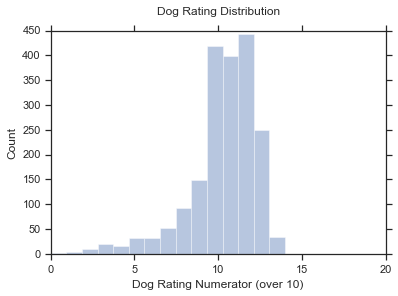

In [89]:
# Seaborn Histogram Plot
sns.set_style("white")
fig, ax = plt.subplots()
ax = sns.distplot(df_limit['rating_num_norm'], bins=15, kde=False);
ax.set(xlim=(0, 20))
ax.set_ylabel("Count")
ax.set_xlabel("Dog Rating Numerator (over 10)");
ax.set_title('Dog Rating Distribution')
ax.title.set_position([.5, 1.05])
plt.show();
fig.savefig('images/1_rating_hist.png', bbox_inches='tight')

The following figure is a linear regression thats shows a positive correlation between rating and favorite count. There are very few cases where a rating of less than 10/10 has more than 20,000 tweet favorites. 

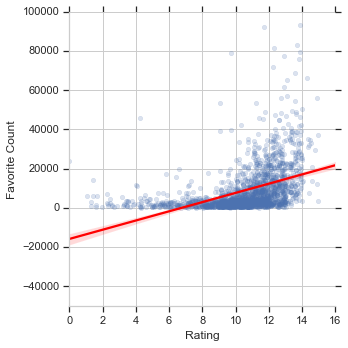

In [88]:
# Rating vs. Favorite Count Linear Regression
sns.set(style="whitegrid")
ax = sns.lmplot(x='rating_num_norm', 
                y='favorite_count', 
                data=df_limit,
                scatter_kws={'alpha':0.2},
                x_jitter=True,
                line_kws={'color': 'red'})
ax.set(xlim=(0, None))   
ax.set(ylim=(None, 100000)) 
plt.xlabel('Rating')
plt.ylabel('Favorite Count')
plt.show();
ax.savefig('images/2_rating_fav_lmplot.png', bbox_inches='tight')

DoggoLingo is pervasive in the WeRateDogs culture so I want to look at the data from the perspective of ratings and the DoggoLingo category. *Floofers* and *puppos* recieve the highest median and mean ratings. 

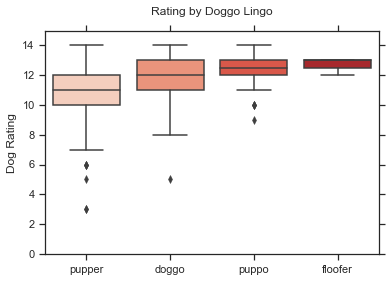

In [90]:
# Rating by Doggo Lingo Boxplot
sns.set_style("white")
fig, ax = plt.subplots()
ax = sns.boxplot(x=df_clean['doggo_lingo'], 
                 y=df_clean["rating_num_norm"],
                 palette="Reds")
ax.set(ylim=(0, 15))
ax.set_ylabel("Dog Rating")
ax.set_xlabel("");
ax.set_title('Rating by Doggo Lingo')
ax.title.set_position([.5, 1.05])
plt.show();
fig.savefig('images/3_rating_lingo_boxplot.png', bbox_inches='tight')

In [91]:
df_clean[['rating_num_norm']].groupby(df_clean['doggo_lingo']).median()

,rating_num_norm
doggo_lingo,
doggo,12.0
floofer,13.0
pupper,11.0
puppo,12.5


In terms of popularity, *floofer* leads the pack in median and mean retweet/favorites counts. However, the other categories have special cases that exceed the maximum popularity of the *floofer* category.

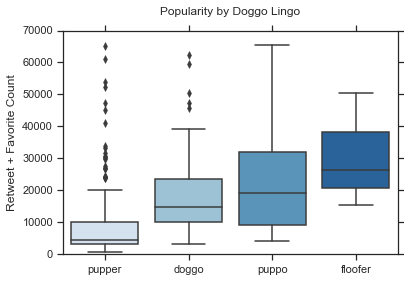

In [92]:
# Popularity by Doggo Lingo Boxplot
sns.set(style="white")
fig, ax = plt.subplots()
ax = sns.boxplot(x=df_clean['doggo_lingo'], 
                 y=(df_clean["favorite_count"]
                    + df_clean["retweet_count"]),
                 palette="Blues")
ax.set(ylim=(None, 70000))
ax.set_ylabel("Retweet + Favorite Count")
ax.set_xlabel("");
ax.set_title('Popularity by Doggo Lingo')
ax.title.set_position([.5, 1.05])
plt.show();
fig.savefig('images/4_popular_linge_boxplot.png', bbox_inches='tight')

In [93]:
df_clean[['favorite_count',
          'retweet_count',
          'rating_num_norm']].groupby(df_clean['doggo_lingo']).median()

,favorite_count,retweet_count,rating_num_norm
doggo_lingo,,,
doggo,11409.0,2976.0,12.0
floofer,22487.0,3677.0,13.0
pupper,3158.0,1096.0,11.0
puppo,16113.5,3347.0,12.5


In [94]:
df_clean[['favorite_count',
          'retweet_count',
          'rating_num_norm']].groupby(df_clean['doggo_lingo']).mean()

,favorite_count,retweet_count,rating_num_norm
doggo_lingo,,,
doggo,16918.521127,5895.521127,11.647887
floofer,22370.666667,8201.666667,12.666667
pupper,7060.415525,2267.200913,10.566210
puppo,23057.571429,6677.964286,12.142857


Since DoggoLingo categories are somewhat vauge and subjective, it made sense to look at the top ten most often tweeted breeds. Interestingly, out of the top ten, 4 of the 5 larger breeds (Golden Retriever, Labrador, Samoyed, Choy) had a higher median popularity than all of the small breeds (Pug, Chihuahua, Pomeranian, Toy Poodle). Followers of the WeRateDogs Twitter account *generally* seem more likely to 'favorite' or 'retweet' large *floofers* over small *puppers* and larger breeds over smaller breeds.

In [95]:
# Find the most tweeted dog breeds
top10_list = df_clean['breed'].value_counts().nlargest(10).index.tolist()
df_clean['breed'].value_counts().nlargest(10)

Golden Retriever      134
Labrador Retriever    94 
Pembroke              86 
Chihuahua             78 
Pug                   54 
Samoyed               40 
Chow                  39 
Pomeranian            38 
Toy Poodle            37 
Malamute              29 
Name: breed, dtype: int64

In [96]:
# Create Filtered DataFrame by top 10 dogs
df_top10 = df_clean[df_clean['breed'].isin(top10_list)]

In [97]:
df_top10[['favorite_count',
          'retweet_count',
          'rating_num_norm']].groupby(df_top10['breed']).mean()

,favorite_count,retweet_count,rating_num_norm
breed,,,
Chihuahua,8649.551282,2791.102564,10.692308
Chow,10237.256410,2893.128205,11.615385
Golden Retriever,12349.604478,3619.656716,11.589552
Labrador Retriever,11571.489362,3742.755319,11.127660
Malamute,8581.931034,2482.000000,10.896552
Pembroke,11244.348837,3112.581395,11.418605
Pomeranian,7936.000000,2768.552632,11.157895
Pug,5774.740741,1769.500000,10.240741
Samoyed,13235.500000,4442.275000,11.700000


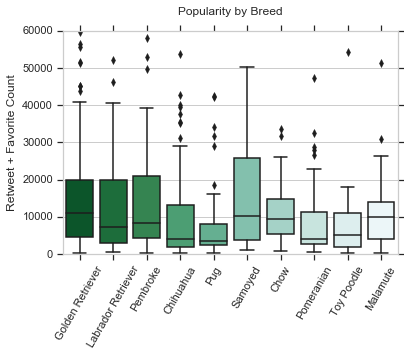

In [98]:
# Plot Dog Breed by Popularity
sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.boxplot(x=df_top10['breed'], 
                 y=df_top10["favorite_count"] 
                 + df_top10["retweet_count"], 
                 order=top10_list,
                 palette="BuGn_r")
ax.set(ylim=(0, 60000))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_ylabel("Retweet + Favorite Count")
ax.set_xlabel("");
ax.set_title('Popularity by Breed')
ax.title.set_position([.5, 1.05])
plt.show();
fig.savefig('images/5_popular_breed_boxplot.png', bbox_inches='tight')